In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns 
import numpy as np
import glob
import re

from toolz.curried import unique


In [2]:
# beige_color = (255/255,253/255,250/255)
beige_color = '#FFFDFA'

# sns.set_theme(style="ticks", rc={'figure.facecolor': beige_color, 'axes.facecolor' : beige_color})
sns.set_theme(style="ticks")
# sns.set_context("talk")
# sns.set_context("poster")


In [3]:
# path = "results/linear_multi"
# path = "Simulations/results/lin"
# path = "Simulations/results/lin/bym0512"
path = "Simulations/results/lin_no_interfer"
all_file = glob.glob(path + "/*.csv")
print(len(all_file))

40


In [4]:
lin_dfs = [pd.read_csv(f) for f in all_file]
combined_df = pd.concat(lin_dfs)
# combined_df['method'] = combined_df['method'].replace({
#     'BYM_1S_rep': 'BYMrep_1S',
#     'BYM_3S_rep': 'BYMrep_3S',
#     'Linear_3S_rep' : 'Linearrep_3S',
#     'Linear_1S_rep' : 'Linearrep_1S',
# })

combined_df[['model', 'type']] = combined_df['method'].str.split('_', expand=True)
# combined_df[combined_df["method"] in ["BYM_1S_rep",]]
# print(combined_df.head(5))
print(combined_df['method'].unique())
print(combined_df['model'].unique())
print(combined_df['type'].unique())

['Linear_oracle' 'BYM_oracle' 'Linear_observed' 'BYM_observed' 'Linear_3S'
 'BYM_3S' 'Linear_1S' 'BYM_1S' 'method']
['Linear' 'BYM' 'method']
['oracle' 'observed' '3S' '1S' None]


In [5]:
print(combined_df.columns, combined_df.shape)

Index(['idx', 'mean', 'median', 'true', 'bias', 'std', 'RMSE', 'RMSE_all',
       'MAE', 'MAE_all', 'MAPE', 'MAPE_all', 'rel_RMSE', 'rel_RMSE_all',
       'q025', 'q975', 'covering', 'mean_ind_cover', 'method', 'estimand',
       'TRUE', 'model', 'type'],
      dtype='object') (4276, 23)


In [6]:
combined_df[['bias','median','true','mean','std','RMSE','RMSE_all','MAE', 'MAE_all', 'MAPE', 'MAPE_all', 'rel_RMSE', 'rel_RMSE_all',
             'q025','q975','covering','mean_ind_cover']] = combined_df[['bias','median','true','mean','std','RMSE','RMSE_all','MAE', 'MAE_all', 'MAPE', 'MAPE_all', 'rel_RMSE', 'rel_RMSE_all',
                                                                        'q025','q975','covering', 'mean_ind_cover']].apply(pd.to_numeric, errors='coerce')

# combined_df[['bias','median','true','mean','std','RMSE','RMSE_all','MAE', 'MAE_all', 'q025','q975','covering','mean_ind_cover']] = combined_df[['bias','median','true','mean','std','RMSE','RMSE_all','MAE', 'MAE_all', 
#                                                                         'q025','q975','covering', 'mean_ind_cover']].apply(pd.to_numeric, errors='coerce')

In [7]:
# combined_df = combined_df.apply(pd.to_numeric, errors='coerce')


combined_df['type'] = combined_df['type'].replace('observed',"Obs.")
combined_df['type'] = combined_df['type'].replace('oracle',"Oracle")
combined_df['type'] = combined_df['type'].replace('plugin',"Plugin")
combined_df['abs_bias'] = np.abs(combined_df['bias'])
combined_df['ci_length'] = combined_df['q975'] - combined_df['q025']
# combined_df['MAPE_manual'] = np.abs((combined_df['mean']-combined_df['true'])/combined_df['true'])
# combined_df['rel_RMSE'] = np.square((combined_df['mean']-combined_df['true'])/combined_df['true'])

# combined_df.to_csv("results/linear_dgp_N300.csv")


In [8]:
# print dtype of each column 
print(combined_df.dtypes)

idx                object
mean              float64
median            float64
true              float64
bias              float64
std               float64
RMSE              float64
RMSE_all          float64
MAE               float64
MAE_all           float64
MAPE              float64
MAPE_all          float64
rel_RMSE          float64
rel_RMSE_all      float64
q025              float64
q975              float64
covering          float64
mean_ind_cover    float64
method             object
estimand           object
TRUE              float64
model              object
type               object
abs_bias          float64
ci_length         float64
dtype: object


14
0.694500025


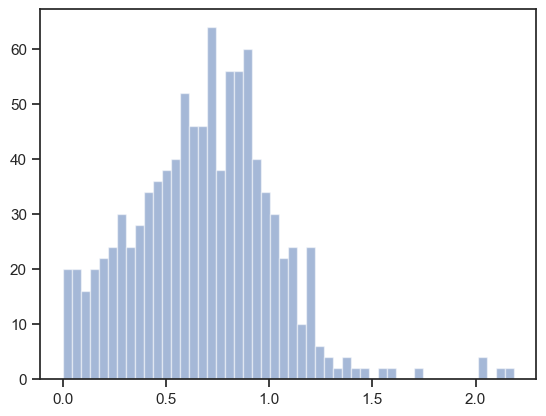

In [17]:
plt.hist(combined_df[combined_df['type'] == '3S']['MAE'], bins=50, alpha=0.5, label='Observed')

# err_mask = (combined_df['type'].values == '3S') & (combined_df['MAE'].values > 3)
err_mask = (combined_df['type'].values == '3S') & (combined_df['MAE'].values > 1.5)
print(err_mask.sum())

print(combined_df[combined_df['type'] == '3S']['MAE'].median())


In [18]:
# err_mask = (combined_df['type'].values == '3S') & (combined_df['MAE'].values > 3)
err_mask = (combined_df['type'].values == '3S') & (combined_df['MAE'].values > 1.5)
err_idx = combined_df[err_mask]['idx'].unique()
combined_df = combined_df[~combined_df['idx'].isin(err_idx)]
print(combined_df.shape)

(3840, 27)


In [11]:
combined_df

,idx,mean,median,true,bias,std,RMSE,RMSE_all,MAE,MAE_all,...,q975,covering,mean_ind_cover,method,estimand,TRUE,model,type,abs_bias,ci_length
0,1.0,1.906,1.905,3.0,-1.094,0.210,1.094,1.114,1.094,1.094,...,2.329000,0.0,0.0,Linear_oracle,dynamic,NaN,Linear,Oracle,1.094,0.828
1,1.0,2.816,2.558,3.0,-0.184,0.966,0.184,0.983,0.184,0.758,...,5.449000,1.0,1.0,BYM_oracle,dynamic,NaN,BYM,Oracle,0.184,3.723
2,1.0,1.906,1.905,3.0,-1.094,0.210,1.094,1.114,1.094,1.094,...,2.329000,0.0,0.0,Linear_oracle,stoch,NaN,Linear,Oracle,1.094,0.828
3,1.0,2.816,2.558,3.0,-0.184,0.966,0.184,0.983,0.184,0.758,...,5.449000,1.0,1.0,BYM_oracle,stoch,NaN,BYM,Oracle,0.184,3.723
4,1.0,1.906,1.905,3.0,-1.094,0.210,1.094,1.114,1.094,1.094,...,2.329000,0.0,0.0,Linear_observed,dynamic,NaN,Linear,Obs.,1.094,0.828
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43,119.0,2.728,2.485,3.0,-0.272,0.838,0.272,0.881,0.272,0.709,...,5.066001,1.0,1.0,BYM_3S,stoch,NaN,BYM,3S,0.272,3.253
44,119.0,2.117,2.115,3.0,-0.883,0.222,0.883,0.910,0.883,0.883,...,2.556000,0.0,0.0,Linear_1S,dynamic,NaN,Linear,1S,0.883,0.865
45,119.0,2.948,2.624,3.0,-0.052,1.044,0.052,1.046,0.052,0.762,...,5.934000,1.0,1.0,BYM_1S,dynamic,NaN,BYM,1S,0.052,4.065
46,119.0,2.117,2.115,3.0,-0.883,0.222,0.883,0.910,0.883,0.883,...,2.556000,0.0,0.0,Linear_1S,stoch,NaN,Linear,1S,0.883,0.865


In [18]:
# Save as csv
combined_df.to_csv("Simulations/results/linear_results_combined_iid_and_bym_N500.csv")

In [19]:
# check which rows in combined_df has true == nan
# print(combined_df[combined_df['true'].isna()])
# remove rows with true == nan
combined_df = combined_df[~combined_df['true'].isna()]
print(combined_df.shape)

(3840, 27)


In [27]:
# Filter the rows where method is 'BYM_3S'
# Filter the rows where method is 'BYM_3S'
print(combined_df.shape)
bym_3s_df = combined_df[(combined_df['method'] == 'BYM_3S') & (combined_df['estimand'] == 'dynamic')]
print(bym_3s_df.shape)
bym_3s_df 

# Sort by 'rel_RMSE' and select the top 500 rows
top_bym_3s_df = bym_3s_df.nsmallest(500, 'rel_RMSE')

print(top_bym_3s_df.shape)

# get unique 'idx' from top_bym_3s_df
idx = top_bym_3s_df['idx'].unique()
combined_df = combined_df[combined_df['idx'].isin(idx)]
print(combined_df.shape)



(8288, 25)
(518, 25)
(500, 25)
(8064, 25)


In [28]:
# TODO: clean all the above in final version

In [ ]:
combined_df = pd.read_csv("Simulations/results/linear_results_combined_iid_and_bym_N500.csv")
# combined_df = pd.read_csv("results/linear_results_combined_N500.csv")
combined_df['rel_RMSE'] = np.sqrt(combined_df['rel_RMSE'])
combined_df['rel_RMSE_all'] = np.sqrt(combined_df['rel_RMSE_all'])

In [20]:
def coverage_perc(x):
    return "{:.1f}".format(np.mean(x)*100)

def mean_std(x):
    mean,std = np.mean(x), np.std(x)
    return "{:.3f} ({:.3f})".format(mean,std)

combined_df['MAE_rel'] = combined_df['MAE']/combined_df['true']

combined_df['rel_CI_length'] = combined_df['ci_length']/combined_df['true']


# df_summary = combined_df.groupby(["estimand", "model", "type"]).agg(
df_summary = combined_df.groupby(["estimand", "model", "type"]).agg(
                                        {
                                            # 'mean' : ['mean'],
                                         # 'median' : ['mean'],
                                         'bias' : [mean_std],
                                         'std' : [mean_std],
                                         'true' : ['mean'],
                                         # 'RMSE' : ['mean'],
                                        #  'RMSE' : [mean_std],
                                         # 'RMSE_all' : ['mean'],
                                        #  'RMSE_all' : [mean_std],
                                        #  'MAE' : [mean_std],
                                        #  'MAE_rel' : [mean_std],
                                        #  'MAE_all' : [mean_std],
                                         'MAPE' : [mean_std],
                                        # 'MAPE_all' : [mean_std],
                                        #  'rel_RMSE' : [mean_std],
                                        # 'rel_RMSE_all' : [mean_std],
                                        #  'q025' : ['mean'],
                                        #  'q975' : ['mean'],
                                        #  'ci_length' : [mean_std],
                                         'rel_CI_length' : [mean_std],
                                         'covering' : [coverage_perc],
                                         'mean_ind_cover' : ['mean'],
                                         }

                                         # 'norm_coverage' : [coverage_perc]}

                                            ).reset_index()
                                         # 'true_included99' : [coverage_perc]})
                                         # 'true_included95' : ['mean'],
                                         # 'true_included99' : ['mean']})

# df_summary.columns = ['estimand','model','type','bias','bias_std', 'rel_RMSE','rel_RMSE_std', 'ci_length','ci_length_std','covering','mean_ind_cover']
# df_summary.columns = ['estimand','model','type','bias','MAPE','rel_CI_length','covering']
df_summary

,estimand,model,type,bias,std,true,MAPE,rel_CI_length,covering,mean_ind_cover
,,,,mean_std,mean_std,mean,mean_std,mean_std,coverage_perc,mean
0,dynamic,BYM,1S,0.135 (0.676),1.052 (0.313),3.0,0.295 (0.132),1.314 (0.390),98.3,0.983333
1,dynamic,BYM,3S,-0.343 (0.439),1.003 (0.422),3.0,0.285 (0.091),1.337 (0.589),100.0,1.000000
2,dynamic,BYM,Obs.,-1.100 (1.463),0.902 (0.289),3.0,0.509 (0.379),1.013 (0.361),65.8,0.658333
3,dynamic,BYM,Oracle,0.138 (0.586),0.903 (0.323),3.0,0.259 (0.101),1.144 (0.400),98.8,0.987500
4,dynamic,Linear,1S,-0.845 (0.216),0.219 (0.008),3.0,0.282 (0.071),0.286 (0.011),5.0,0.050000
5,dynamic,Linear,3S,-0.845 (0.217),0.216 (0.016),3.0,0.282 (0.071),0.277 (0.024),5.8,0.058333
6,dynamic,Linear,Obs.,-0.845 (0.216),0.219 (0.008),3.0,0.282 (0.071),0.286 (0.011),5.0,0.050000
7,dynamic,Linear,Oracle,-0.845 (0.216),0.219 (0.008),3.0,0.282 (0.071),0.286 (0.011),5.0,0.050000
8,stoch,BYM,1S,0.135 (0.676),1.052 (0.313),3.0,0.295 (0.132),1.314 (0.390),98.3,0.983333


In [ ]:
# def generate_latex_table(df):   

#     # Start the LaTeX table
#     latex_table = [
#         "\\begin{table}[htbp]",
#         "\\centering",
#         "\\caption{Simulation Results}",
#         "\\label{tab:simulation_results}",
#         "\\begin{tabular}{lllcccc}",
#         "\\toprule",
#         "Estimand & Model & Type & Bias (std) & MAPE (std) & CI Length (std) & Coverage \\\\"
#      ]
    
#     latex_table.append("\\midrule")

#     # Group by estimand and model
#     for e, (estimand, estimand_group) in enumerate(df.groupby('estimand')):
#         for m, (model, model_group) in enumerate(estimand_group.groupby('model')):
#             if m > 0:
#                 latex_table += "\\cmidrule{2-7}\n"

#             for i, (_, row) in enumerate(model_group.iterrows()):
#                 if i == 0:
#                     if m == 0:
#                         latex_table += f"\\multirow{{8}}{{*}}{{{estimand}}} & "
#                     else:
#                         latex_table += " & "
#                     latex_table += f"\\multirow{{4}}{{*}}{{{model}}} "
#                 else:
#                     latex_table += " & "
                
#                 latex_table += f"& {row['type']} & {row['bias']} & {row['MAPE']} & {row['rel_CI_length']} & {row['covering']} \\\\\n"

#         if e == 0:  # Add midrule after first estimand
#             latex_table += "\\midrule\n"

#     # End the LaTeX table
#     latex_table += "\\bottomrule\n\\end{tabular}\n\\end{table}"

#     return '\n'.join(latex_table)




def clean_value(value_str):
    """Helper function to clean the values from DataFrame"""
    if isinstance(value_str, float):
        return f"{value_str:.3f}"
    
    # Remove the pandas metadata
    if 'mean_std' in str(value_str):
        return str(value_str).split('mean_std')[-1].strip()
    elif 'coverage_perc' in str(value_str):
        value = float(str(value_str).split('coverage_perc')[-1].strip().split('\n')[0])
        return f"{value:.1f}\\%"
    return str(value_str)

def generate_latex_table(df):
    # Start the LaTeX table
    latex_table = [
        "\\begin{tabular}{lllcccc}",
        "\\toprule",
        "Estimand & Model & Type & Bias (std) & MAPE (std) & Rel. CI Length (std) & Coverage \\\\",
        "\\midrule"
    ]
    
    # Replace model names
    model_map = {'Linear': 'IID', 'BYM': 'BYM'}
    type_map = {'1S': 'PI', '3S': 'MS', 'Obs.': 'Obs.', 'Oracle': 'Oracle'}
    estimand_map = {'dynamic': 'Dynamic', 'stoch': 'Stochastic'}
    
    # Group by estimand
    for estimand, estimand_group in df.groupby('estimand'):
        first_estimand = True
        
        # Process each model within this estimand
        for model, model_group in estimand_group.groupby('model'):
            # Add line above new model group (except first)
            if not first_estimand:
                latex_table.append("\\cmidrule{2-7}")
            
            # Sort by type to match the order in the example
            type_order = ['PI', 'MS', 'Obs.', 'Oracle']
            model_group = model_group.sort_values('type')
            
            for i, (_, row) in enumerate(model_group.iterrows()):
                line_parts = []
                
                # Add estimand on first row only
                if first_estimand and i == 0:
                    line_parts.append(f"\\multirow{{8}}{{*}}{{{estimand_map[estimand]}}}")
                else:
                    line_parts.append("")
                
                # Add model on first row of each model group
                if i == 0:
                    line_parts.append(f"\\multirow{{4}}{{*}}{{{model_map[model]}}}")
                else:
                    line_parts.append("")
                
                # Map the type to the desired format
                row_type = type_map[row['type']]
                
                # Clean and add values
                line_parts.extend([
                    row_type,
                    clean_value(row['bias']),
                    clean_value(row['MAPE']),
                    clean_value(row['rel_CI_length']),
                    clean_value(row['covering'])
                ])
                
                # Join the parts with & and add line ending
                latex_table.append(" & ".join(line_parts) + " \\\\")
            
            first_estimand = False
        
        # Add midrule between estimands (except after last)
        if estimand != df['estimand'].iloc[-1]:
            latex_table.append("\\midrule")
    
    # Close the table
    latex_table.append("\\bottomrule")
    latex_table.append("\\end{tabular}")
    
    return "\n".join(latex_table)

# Assuming your DataFrame is called 'results_df'
latex_table = generate_latex_table(df_summary)
print(latex_table)

\begin{tabular}{lllcccc}
\toprule
Estimand & Model & Type & Bias (std) & MAPE (std) & Rel. CI Length (std) & Coverage \\
\midrule
\multirow{8}{*}{Dynamic} & \multirow{4}{*}{BYM} & PI & 0.016 (0.104) & 0.244 (0.054) & 1.115 (0.223) & 100.0 \\
 &  & MS & -0.202 (0.087) & 0.382 (0.074) & 1.295 (0.453) & 92.3 \\
 &  & Obs. & -0.390 (0.298) & 0.680 (0.376) & 1.534 (0.531) & 78.2 \\
 &  & Oracle & 0.005 (0.102) & 0.220 (0.058) & 0.969 (0.260) & 99.0 \\
\cmidrule{2-7}
 & \multirow{4}{*}{IID} & PI & -0.128 (0.093) & 0.225 (0.087) & 0.532 (0.062) & 71.4 \\
 &  & MS & -0.302 (0.045) & 0.437 (0.065) & 0.430 (0.035) & 0.8 \\
 &  & Obs. & -0.383 (0.064) & 0.554 (0.093) & 0.399 (0.028) & 0.0 \\
 &  & Oracle & -0.155 (0.065) & 0.233 (0.081) & 0.398 (0.030) & 42.3 \\
\midrule
\multirow{8}{*}{Stochastic} & \multirow{4}{*}{BYM} & PI & 0.087 (0.396) & 0.245 (0.056) & 1.127 (0.226) & 99.8 \\
 &  & MS & -0.743 (0.330) & 0.377 (0.074) & 1.304 (0.456) & 92.7 \\
 &  & Obs. & -1.489 (1.097) & 0.670 (0.363) & 1

Text(0, 0.5, '')

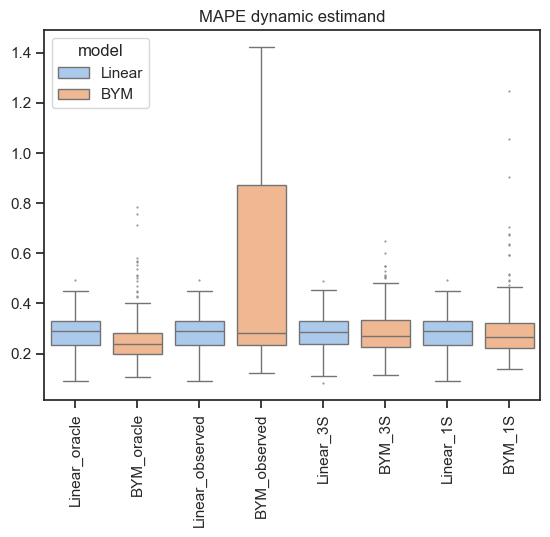

In [21]:
flierprops = dict(marker='.', markerfacecolor='None', markersize=1,  markeredgecolor='grey')
box_rmse = sns.boxplot(data=combined_df[combined_df["estimand"]=="dynamic"], x = 'method', y = 'MAPE',
               # order = ['Oracle', 'Plugin','1','Cut-3S','Obs.'],
                       hue = "model", palette = 'pastel',
                       flierprops=flierprops)
box_rmse.set_title("MAPE dynamic estimand")
# plt.ylim(0,.5)
plt.xticks(rotation=90)
box_rmse.set_xlabel("")
box_rmse.set_ylabel("")
# sns.despine()

Text(0, 0.5, '')

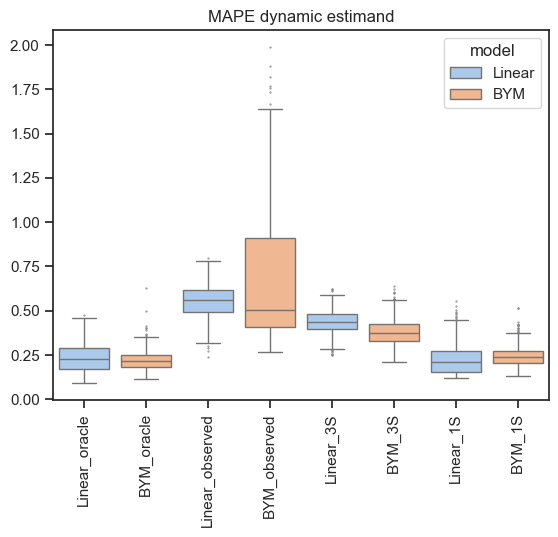

In [65]:
flierprops = dict(marker='.', markerfacecolor='None', markersize=1,  markeredgecolor='grey')
box_rmse = sns.boxplot(data=combined_df[combined_df["estimand"]=="dynamic"], x = 'method', y = 'MAPE',
               # order = ['Oracle', 'Plugin','1','Cut-3S','Obs.'],
                       hue = "model", palette = 'pastel',
                       flierprops=flierprops)
box_rmse.set_title("MAPE dynamic estimand")
# plt.ylim(0,.5)
plt.xticks(rotation=90)
box_rmse.set_xlabel("")
box_rmse.set_ylabel("")
# sns.despine()

In [17]:
# Zeigen MAE plots

from matplotlib.ticker import PercentFormatter

plt.style.use('seaborn-v0_8-colorblind')
# sns.set_style("whitegrid")
sns.set_style("ticks")
sns.set_context("paper", font_scale=1.3)


zeigen_mae_obs = np.loadtxt('Simulations/results/zeigen_mae_obs.txt')
esti_zeigen_mae_post = np.loadtxt('Simulations/results/esti_zeigen_mae_post.txt')
zeigen_mae_post = np.loadtxt('Simulations/results/zeigen_mae_post.txt')

# remove all values above 3 (lack of convergence of network model, also removed from main results)
zeigen_mae_obs = zeigen_mae_obs[zeigen_mae_obs < 3]
esti_zeigen_mae_post = esti_zeigen_mae_post[esti_zeigen_mae_post < 3]
zeigen_mae_post = zeigen_mae_post[zeigen_mae_post < 3]

# print shape of each file
print(zeigen_mae_obs.shape)
print(esti_zeigen_mae_post.shape)
print(zeigen_mae_post.shape)



(598,)
(563,)
(563,)


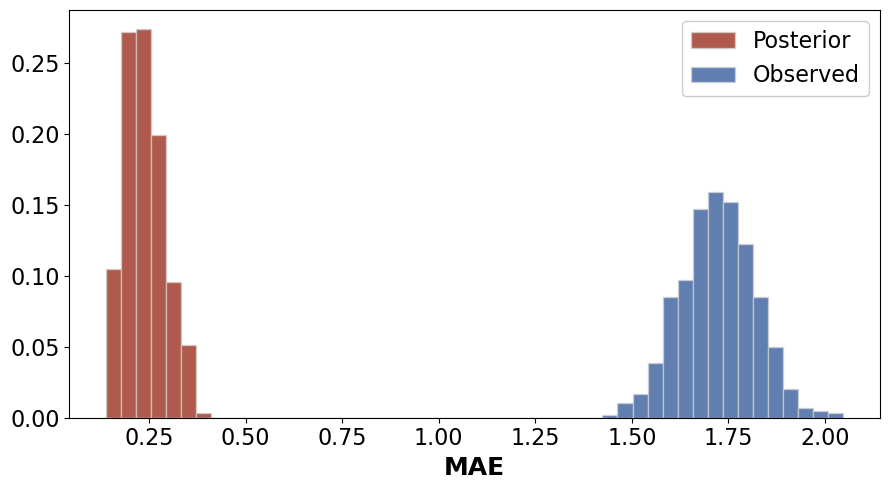

In [19]:
def plot_percentage_histogram(data, bin_edges, ax, label, color, alpha=0.7):
    counts, _ = np.histogram(data, bins=bin_edges, density=True)
    bin_widths = np.diff(bin_edges)
    # percentage = counts * bin_widths * 100  # Convert to percentage
    percentage = counts * bin_widths   # Convert to percentage
    ax.bar(bin_edges[:-1], percentage, width=bin_widths, alpha=alpha, label=label,
            color=color, align='edge', edgecolor="lightgrey")


# Set the figure style
plt.style.use('default')  # Reset to default style
fig, ax = plt.subplots(figsize=(9, 5), facecolor='white')  # Set figure background to white
ax.set_facecolor('white')  # Set axis background to white


# Define common bin edges
common_bin_edges = np.linspace(min(min(zeigen_mae_obs), min(esti_zeigen_mae_post)), 
                               max(max(zeigen_mae_obs), max(esti_zeigen_mae_post)), 
                               50)  

# Plot histograms as density
plot_percentage_histogram(esti_zeigen_mae_post, common_bin_edges, ax, 'Posterior', 'xkcd:brick red')
plot_percentage_histogram(zeigen_mae_obs, common_bin_edges, ax, 'Observed', 'xkcd:cobalt')

# Set labels and title
ax.set_xlabel('MAE', fontsize=18, fontweight='bold')
ax.set_ylabel('')
ax.set_title('')

# Adjust y-axis to show correct percentage
# ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f"{x:.1f}%"))

# Increase font size of tick labels
ax.tick_params(axis='both', which='major', labelsize=16)

# Add legend
ax.legend(fontsize=16, frameon=True, fancybox=True, framealpha=1)

# Set edges to black
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black')
ax.spines['left'].set_color('black')
ax.spines['right'].set_color('black')

# Save the figure
plt.tight_layout()
plt.savefig('Simulations/results/figs/mae_hist.png', dpi=1000)
plt.show()
